In [1]:
import pandas as pd

#read csv file from folder
df= pd.read_csv(r"C:\Users\User\Downloads\BD_Weather_Data.csv")
df

,Date,AvgTemp,MaxTemp,MinTemp,City,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir,WindSpeed,Humidity,Air Pressure,Cloud
0,01-02-25,20.7,22.4,19.5,Dhaka,15.6,6.2,0.0,41,S,17,92,1017.6,8
1,02-02-25,22.4,25.6,19.5,Gazipur,6.0,3.4,2.7,41,W,9,83,1017.9,7
2,03-02-25,23.5,24.5,21.6,Kishoreganj,6.6,2.4,0.1,41,ESE,17,88,1016.7,7
3,04-02-25,21.4,22.8,20.2,Manikganj,18.8,2.2,0.0,41,NNE,22,83,1014.2,8
4,05-02-25,22.5,25.7,19.7,Munshiganj,77.4,4.8,0.0,41,NNE,11,88,1008.3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15-08-25,12.4,18.8,9.4,Gazipur,0.0,4.6,10.7,41,W,22,49,1013.4,1
196,16-08-25,13.2,18.0,10.5,Kishoreganj,0.0,4.0,9.2,41,W,22,48,1011.8,1
197,17-08-25,10.4,16.4,6.9,Manikganj,0.0,4.6,10.4,41,W,17,45,1021.9,1
198,18-08-25,9.2,15.8,5.6,Munshiganj,0.0,3.4,7.6,41,W,20,59,1024.9,6


### Find The Hottest Day

In [2]:
hottest = df.loc[df["MaxTemp"].idxmax()]

print("Date:", hottest["Date"], "\nTemperature:", hottest["MaxTemp"],"°C", "\nCity:", hottest["City"])

Date: 27-02-25 
Temperature: 29.0 °C 
City: Dhaka


### Find The Coldest Day

In [3]:
coldest = df.loc[df["MinTemp"].idxmin()]

print("Date:", coldest["Date"], "\nTemperature:", coldest["MinTemp"],"°C", "\nCity:", coldest["City"])

Date: 19-08-25 
Temperature: 5.3 °C 
City: Narayanganj


### Find Monthly Average Temperature

In [4]:
# Convert date column to panda Datetime format 

df["Date"] = pd.to_datetime(df["Date"])


# Extract Month Name
                            
df["Month"] = df["Date"].dt.strftime("%B") 


# Calculate Monthly Average

monthly_avg = df.groupby("Month")["AvgTemp"].mean().round(2)
print(monthly_avg)

Month
April        15.91
August       13.50
December     15.63
February     19.54
January      16.01
July         11.82
June         13.56
March        19.18
May          13.88
November     16.47
October      14.61
September    14.37
Name: AvgTemp, dtype: float64


### Plotting Monthly Average Temperature

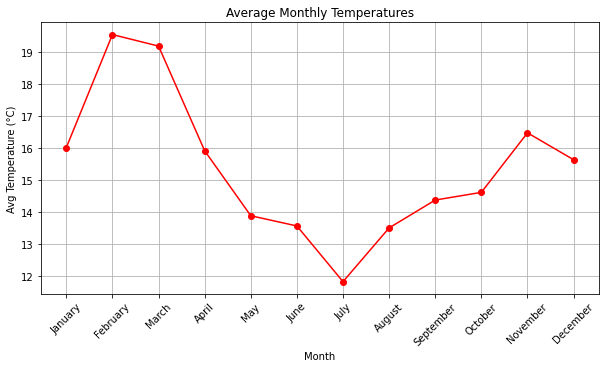

In [5]:
import matplotlib.pyplot as plt

# Month order list by Calendar 
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]


# Reindex monthly_avg to calendar order
monthly_avg = monthly_avg.reindex(month_order)


# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')

# Labels and title
plt.title("Average Monthly Temperatures")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(rotation=45)   # Rotate month names for readability
plt.grid(True)
plt.show()

### Find Seasonal Average Temperature

In [6]:
# Define function to map month → season

def get_season(month):
    if month in ["December", "January"]:
        return "Winter"
    elif month in ['February','March']:
        return "Spring"
    elif month in ['April','May']:
        return "Summer"
    elif month in ['June','July']:
        return "Rainy"
    elif month in ['August','September']:
        return "Autumn"
    else:  # ['October','November']
        return "Late Autumn"
    

df["Season"] = df["Month"].apply(get_season)

# Calculate Seasonal Averages
seasonal_avg = df.groupby("Season")["AvgTemp"].mean().round(2)
print(seasonal_avg)

Season
Autumn         13.79
Late Autumn    15.54
Rainy          12.67
Spring         19.35
Summer         14.88
Winter         15.82
Name: AvgTemp, dtype: float64


### Plotting Seasonal Average Temperature

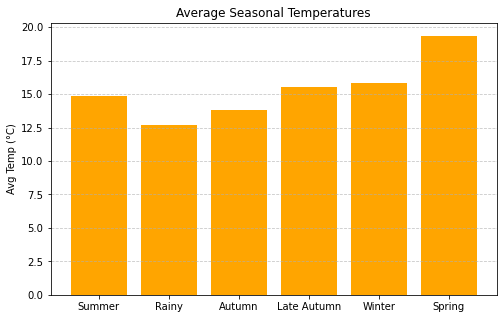

In [7]:
season_order = ["Summer","Rainy","Autumn","Late Autumn","Winter","Spring"]

seasonal_avg = seasonal_avg.reindex(season_order)

# Plot seasonal_avg temperature bars
plt.figure(figsize=(8,5))
plt.bar(season_order, seasonal_avg.values, color="orange")
plt.title("Average Seasonal Temperatures")
plt.ylabel("Avg Temp (°C)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

###  Find Highest Rainfall

In [8]:
highest_rainfall = df.loc[df["Rainfall"].idxmax()]

print("Date:", highest_rainfall["Date"], "\nRainfall:", highest_rainfall["Rainfall"], "\nCity:", highest_rainfall["City"])

Date: 2025-05-02 00:00:00 
Rainfall: 77.4 
City: Munshiganj


### Find Lowest Rainfall

In [9]:
lowest_rainfall = df.loc[df["Rainfall"].idxmin()]

print("Date:", lowest_rainfall["Date"], "\nRainfall:", lowest_rainfall["Rainfall"], "\nCity:", lowest_rainfall["City"])

Date: 2025-11-02 00:00:00 
Rainfall: 0.0 
City: Madaripur


### Plotting City Wise Average Rainfall 

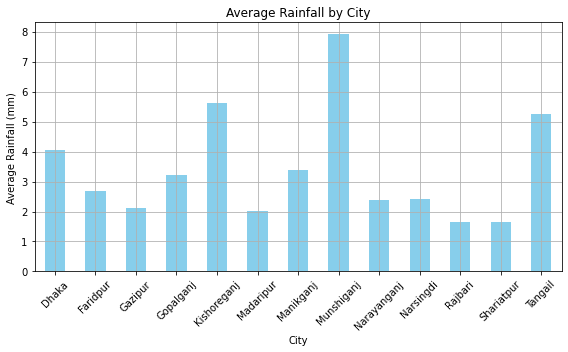

In [10]:
city_rainfall_avg = df.groupby("City")["Rainfall"].mean()

# Plot city_rainfall_avg bars
city_rainfall_avg.plot(kind="bar", figsize=(8,5), color="skyblue")

# Labels and title
plt.title("Average Rainfall by City")
plt.xlabel("City")
plt.ylabel("Average Rainfall (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Find City Wise Average Temperature & Rainfall 

In [11]:
city_stats = df.groupby("City").agg({
    "AvgTemp": "mean",     # average temperature
    "Rainfall": "mean"      # total rainfall
}).round(2)

print(city_stats)

             AvgTemp  Rainfall
City                          
Dhaka          16.45      4.06
Faridpur       15.65      2.68
Gazipur        16.32      2.12
Gopalganj      15.08      3.23
Kishoreganj    15.44      5.62
Madaripur      14.35      2.01
Manikganj      14.47      3.38
Munshiganj     15.23      7.91
Narayanganj    15.05      2.39
Narsingdi      15.97      2.41
Rajbari        14.68      1.64
Shariatpur     15.29      1.64
Tangail        16.29      5.25


### Plotting City Wise Average Temperature & Rainfall 

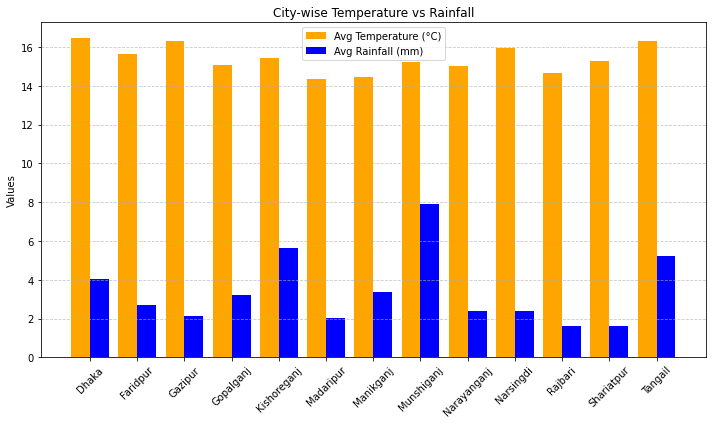

In [12]:
import numpy as np

# Get City Names
cities = city_stats.index

# Values
temps = city_stats["AvgTemp"]
rain = city_stats["Rainfall"]

# X positions
x = np.arange(len(cities))
width = 0.4  # width of each bar

# Create subplots
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot temperature bars
ax1.bar(x - width/2, temps, width, label="Avg Temperature (°C)", color="orange")

# Plot rainfall bars
ax1.bar(x + width/2, rain, width, label="Avg Rainfall (mm)", color="blue")

# Labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(cities, rotation=45)
ax1.set_ylabel("Values")
ax1.set_title("City-wise Temperature vs Rainfall")
plt.grid(axis="y", linestyle="--", alpha=0.7)
ax1.legend()
plt.tight_layout()
plt.show()


### Find Seasonal Average Rainfall & Plotting that..

Season
Autumn         4.49
Late Autumn    2.69
Rainy          2.15
Spring         2.62
Summer         5.20
Winter         3.89
Name: Rainfall, dtype: float64


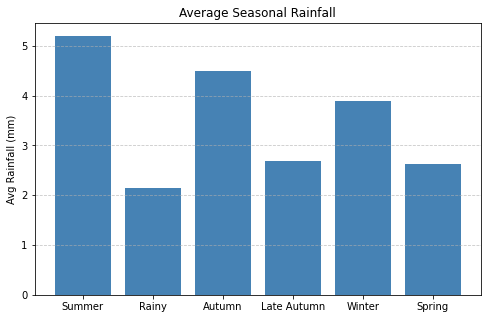

In [13]:
#Get Average Rainfall
seasonal_avg = df.groupby("Season")["Rainfall"].mean().round(2)
print(seasonal_avg)

seasonal_avg = seasonal_avg.reindex(season_order)

# Plot average rainfall bars
plt.figure(figsize=(8,5))
plt.bar(season_order, seasonal_avg.values, color="steelblue")

# Labels and title
plt.title("Average Seasonal Rainfall")
plt.ylabel("Avg Rainfall (mm)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()